# ROC Curve - Multiclass
Vinicius Trevisan - 2022

## Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(y_test[:, i].shape, y_test[:, i])
    print(y_score[:, i].shape, y_score[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

(75,) [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1
 0]
(75,) [-0.76301132 -0.20224493  0.11801481 -0.90780855 -0.01116192 -0.6048727
  0.02283491 -0.61076876 -0.37572754 -0.47017411 -0.42224234 -0.3355867
 -0.22723929 -0.07856729 -0.53383361  0.12163662 -0.71356947 -0.55111511
  0.37991331 -0.11107635 -0.70713712 -0.02392675 -0.25045747  0.12675547
 -0.68210402 -0.08001795 -0.03259341 -0.04953425 -0.12974835 -0.19299299
 -0.3619768  -0.22818639 -0.06196433 -0.52455061 -0.40026409 -0.35056585
 -0.05770139 -1.11907501  0.19599366 -0.04299172 -0.48108269  0.1741885
 -0.41416456 -0.01053513  0.01645355 -0.11932181 -0.70817199 -0.77303401
 -0.61489613 -0.96334774 -0.31037723 -0.31952657 -0.35306417  0.12127427
 -0.6643231  -0.55149778 -0.55695146 -0.41111447 -0.49463336  0.06910059
 -0.23036784  0.30342285  0.17642852 -0.1906155  -0.42910413 -0.67759563
 -0.32958811 -0.97119543  0.020881

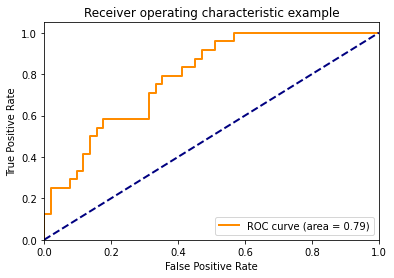

In [29]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

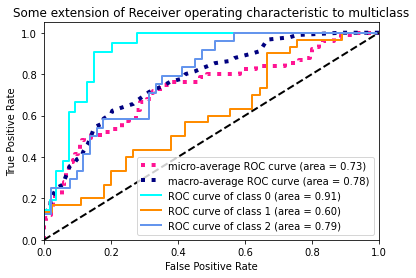

In [30]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [15]:
model_multiclass.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [16]:
y_pred = model_multiclass.predict(X_test)

In [17]:
y_proba = model_multiclass.predict_proba(X_test)

## ROC Curve - One vs Rest (OvR)
Compares each class with the rest of the classes

In [18]:
classes = model_multiclass.classes_
classes

array(['apple', 'banana', 'orange'], dtype=object)

              x          y  class  prob
1021  17.175769   1.846829      0  0.98
538    1.440628   3.695375      0  0.00
1150   6.592357   9.830070      0  0.00
497    6.522978  -2.198984      1  1.00
118   13.320908  -0.484797      1  1.00
...         ...        ...    ...   ...
305   12.177926  -0.698750      1  1.00
415    4.611242   4.972769      1  0.24
1447  10.340554  15.764920      0  0.00
769   -5.516186  -2.540122      0  0.08
296    3.424829  -3.094594      1  0.68

[300 rows x 4 columns]
              x          y  class  prob
1021  17.175769   1.846829      0  0.00
538    1.440628   3.695375      1  1.00
1150   6.592357   9.830070      0  0.00
497    6.522978  -2.198984      0  0.00
118   13.320908  -0.484797      0  0.00
...         ...        ...    ...   ...
305   12.177926  -0.698750      0  0.00
415    4.611242   4.972769      0  0.58
1447  10.340554  15.764920      0  0.00
769   -5.516186  -2.540122      1  0.92
296    3.424829  -3.094594      0  0.32

[300 rows x 4 c

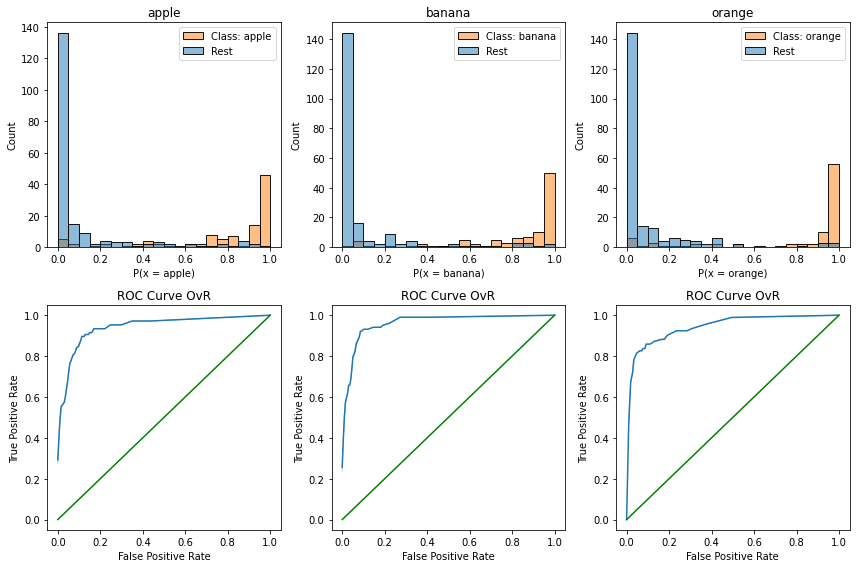

In [27]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}


for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    # print(y_proba)
    
    # break
    df_aux = df_aux.reset_index(drop = True)
    print(df_aux)
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [20]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

apple ROC AUC OvR: 0.9414
banana ROC AUC OvR: 0.9611
orange ROC AUC OvR: 0.9428
average ROC AUC OvR: 0.9484


In [21]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovr', average = 'macro')

0.9410360521456197

## ROC Curve - One vs One (OvO)
Compares each possible combination of the classes, two at a time

In [22]:
classes_combinations = []
class_list = list(classes)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])
classes_combinations

[['apple', 'banana'],
 ['banana', 'apple'],
 ['apple', 'orange'],
 ['orange', 'apple'],
 ['banana', 'orange'],
 ['orange', 'banana']]

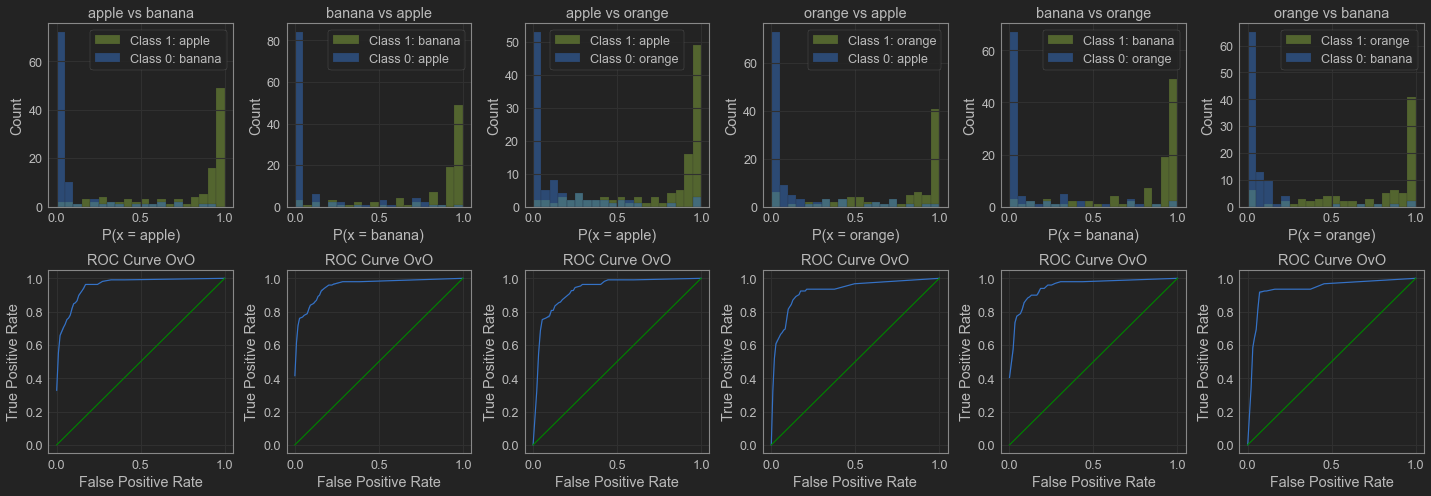

In [23]:
# Plots the Probability Distributions and the ROC Curves One vs ONe
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}

for i in range(len(classes_combinations)):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = c1 + " vs " +c2
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = y_test
    df_aux['prob'] = y_proba[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
    
plt.tight_layout()

In [24]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovo:
    avg_roc_auc += roc_auc_ovo[k]
    i += 1
    print(f"{k} ROC AUC OvO: {roc_auc_ovo[k]:.4f}")
print(f"average ROC AUC OvO: {avg_roc_auc/i:.4f}")

apple vs banana ROC AUC OvO: 0.9561
banana vs apple ROC AUC OvO: 0.9547
apple vs orange ROC AUC OvO: 0.9279
orange vs apple ROC AUC OvO: 0.9231
banana vs orange ROC AUC OvO: 0.9498
orange vs banana ROC AUC OvO: 0.9336
average ROC AUC OvO: 0.9409


In [25]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_proba, labels = classes, multi_class = 'ovo', average = 'macro')

0.9408779995138192